In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as siuuu
import os
import cv2
from PIL import Image 
from xml.etree import ElementTree
import shutil
import random
import PIL.Image as Image
import torchvision.transforms as T
import matplotlib.patches as patches

/home/long/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [30]:
!nvidia-smi

Fri Nov 15 11:21:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060        Off | 00000000:02:00.0 Off |                  N/A |
|  0%   46C    P8              11W / 170W |  10508MiB / 12288MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [65]:
tensorboard-to-html --logdir ./logs --output ./output.html

SyntaxError: invalid syntax (427842233.py, line 1)

In [9]:

def load_images_and_masks(folder_path):
    images = []
    img_info = []
    xml_list = []
    
    # List all jpg files and sort them to ensure consistent ordering
    jpg_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

    for jpg_file in jpg_files:
        # Load image
        img_path = os.path.join(folder_path, jpg_file)
        img = cv2.imread(img_path)
        
        if img is None:
            print(f"Warning: Image file {jpg_file} could not be loaded.")
            continue
        
        # Load corresponding mask
        xml_file = jpg_file.replace('.jpg', '.xml')
        xml_path = os.path.join(folder_path, xml_file)
        xml_list.append(xml_path)
        
        if os.path.exists(xml_path):
            
            img_info.append(lmao(xml_path))
            images.append(img)

    
    return (images), img_info,xml_list


In [10]:
def lmao(xml_path):
    polygon_annot = []
    bndbox_annot = []
    tree = ElementTree.parse(xml_path)
    root = tree.getroot()
    
    for obj in root.findall('object'):
        polygon = obj.find('polygon')
        points = []
        
        bndbox = obj.find('bndbox')
        
        
        # Extract points by parsing the x1, y1, x2, y2, etc. fields
        i = 1
        while True:
            x_tag = f'x{i}'
            y_tag = f'y{i}'
            x = polygon.find(x_tag)
            y = polygon.find(y_tag)
            
            
            if x is None or y is None:
                break  # No more points

            try:
                # Convert the text to integer points
                x = int(float(x.text))
                y = int(float(y.text))
                points.append(x)
                points.append(y)
                
                
            except Exception as e:
                print(f"Error parsing point {x_tag}, {y_tag} in {xml_path}: {e}")
            
            i += 1
        polygon_annot.append(points)
        
        
        x_min_tag = f'xmin'
        x_max_tag = f'xmax'
        y_min_tag = 'ymin'
        y_max_tag = 'ymax'
        
        xmin = bndbox.find(x_min_tag)
        ymin = bndbox.find(y_min_tag)        
        xmax = bndbox.find(x_max_tag)
        ymax = bndbox.find(y_max_tag)        
        
        try:
            
            xmin = float(xmin.text)# int(float(xmin.text))
            ymin = float(ymin.text)
            xmax = float(xmax.text)
            ymax = float(ymax.text)            
            bndbox_annot.append([xmin, xmax, ymin, ymax])
            

            
        except Exception as e:
            print(f"Error parsing box {x_min_tag}, {y_min_tag} in {xml_path}: {e}") 
            
            
            
            
            
    for size in root.findall('size'):
        img_width = size.find('width')
        img_width =  int(float(img_width.text))
        
        
        img_height = size.find('height')
        img_height =  int(float(img_height.text))
        

        
    return  bndbox_annot,polygon_annot,(img_width,img_height)

In [11]:


###func 1 


def xoay_180(img: np.ndarray, bndbox_annot: list, polygon_annot: list, size: tuple):
    rotated_bndbox = []
    rotated_polygon = []
    img = Image.fromarray(img)
    

    rotated_img = img.transpose(method=Image.Transpose.ROTATE_180)
    
    img_width = size[0]
    img_height = size[1]


    for box in bndbox_annot:
        xmin, xmax, ymin, ymax = box
        new_xmin =  np.max([ img_width - xmax,0])
        new_xmax =  np.max([ img_width - xmin,0])
        new_ymin =  np.max([ img_height - ymax,0])
        new_ymax =  np.max([ img_height - ymin,0])
        rotated_bndbox.append([new_xmin, new_xmax, new_ymin, new_ymax])

    for polygon in polygon_annot:
        new_polygon = []
        for i in range(0, len(polygon), 2):
            x, y = polygon[i], polygon[i + 1]
            new_x = img_width - x
            new_y = img_height - y
            new_polygon.extend([new_x, new_y])
        rotated_polygon.append(new_polygon)
        
    
        
    return np.array(rotated_img), rotated_bndbox, rotated_polygon,size




In [12]:

##########3FUNC 222222

def xoay_270(img: np.ndarray , bndbox_annot: list ,polygon_annot: list, size: tuple):


    rotated_bndbox = []
    rotated_polygon =[]
    img = Image.fromarray(img)
    
    
    
    def get_aug_270(img):
        rotated_img = img.transpose(method=Image.Transpose.ROTATE_270)
    #     new_img = a(img)
        return rotated_img
    rotated_img = get_aug_270(img)
    
    img_width = size[0]
    img_height = size[1]

    
    for box in bndbox_annot:
        xmin, xmax, ymin, ymax = box
        box_corners = [
            (img_height - ymax, xmin),
            (img_height - ymax, xmax),
            (img_height - ymin, xmin),
            (img_height - ymin, xmax)
        ]
        new_xmin = np.max([  min([pt[0] for pt in box_corners]) ,0])
        new_xmax =  np.max([ max([pt[0] for pt in box_corners]),0])
        new_ymin =  np.max([ min([pt[1] for pt in box_corners]),0])
        new_ymax =  np.max([ max([pt[1] for pt in box_corners]),0])
        rotated_bndbox.append([new_xmin, new_xmax, new_ymin, new_ymax])        

    for polygon in polygon_annot:
        new_polygon = []
        for i in range(0, len(polygon), 2):
            x, y = polygon[i], polygon[i+1]

            
            new_x = img_height - y
            new_y = x
            new_polygon.extend([new_x, new_y])
        rotated_polygon.append(new_polygon)
        
    size = (img_height,img_width)     
        
    return np.array(rotated_img),rotated_bndbox,rotated_polygon,size
#     for poly in polygon_annot:
#         for i in range(0, len(poly), 2):
#             get_x = poly[i] 
#             poly[i] = 1 - poly[i+1]
#             poly[i+1] = get_x

In [13]:
def horizontal_flip(img: np.ndarray, bndbox_annot: list, polygon_annot: list, size: tuple):
    flipped_bndbox = []
    flipped_polygon = []
    img = Image.fromarray(img)
    hor_flip = T.Compose([
        T.RandomHorizontalFlip(p=1)
    ])

    # Flip the image horizontally
    flipped_img = hor_flip(img)
    
    img_width = size[0]

    # Flip bounding boxes horizontally
    for box in bndbox_annot:
        xmin, xmax, ymin, ymax = box
        new_xmin = np.max([  img_width - xmax,0])
        new_xmax =  np.max([ img_width - xmin,0])
        flipped_bndbox.append([new_xmin, new_xmax, ymin, ymax])

    # Flip polygon points horizontally
    for polygon in polygon_annot:
        new_polygon = []
        for i in range(0, len(polygon), 2):
            x, y = polygon[i], polygon[i + 1]
            new_x = img_width - x
            new_polygon.extend([new_x, y])
        flipped_polygon.append(new_polygon)
        
    return np.array(flipped_img), flipped_bndbox, flipped_polygon,size

In [14]:
def vertical_flip(img: np.ndarray, bndbox_annot: list, polygon_annot: list, size: tuple):
    flipped_bndbox = []
    flipped_polygon = []
    img = Image.fromarray(img)
    ver_flip = T.Compose([
        T.RandomVerticalFlip(p=1)
    ])

    # Flip the image horizontally
    flipped_img = ver_flip(img)
    
    img_height = size[1]

    # Flip bounding boxes horizontally
    for box in bndbox_annot:
        xmin, xmax, ymin, ymax = box
        new_ymin =  np.max([ img_height - ymax,0])
        new_ymax =  np.max([ img_height - ymin,0])
        flipped_bndbox.append([xmin, xmax, new_ymin, new_ymax])

    # Flip polygon points horizontally
    for polygon in polygon_annot:
        new_polygon = []
        for i in range(0, len(polygon), 2):
            x, y = polygon[i], polygon[i + 1]
            new_y = img_height - y
            new_polygon.extend([x, new_y])
        flipped_polygon.append(new_polygon)
        
        
        
    return np.array(flipped_img), flipped_bndbox, flipped_polygon,size



In [15]:
def xoay_90(img: np.ndarray, bndbox_annot: list, polygon_annot: list, size: tuple):
    rotated_bndbox = []
    rotated_polygon = []
    img = Image.fromarray(img)
    

    rotated_img = img.transpose(method=Image.Transpose.ROTATE_90)
    
    img_width = size[0]
    img_height = size[1]

    for box in bndbox_annot:
        xmin, xmax, ymin, ymax = box
        box_corners = [
            (ymin, img_width - xmax),
            (ymax, img_width - xmax),
            (ymin, img_width - xmin),
            (ymax, img_width - xmin )
        ]
        new_xmin = max(min(pt[0] for pt in box_corners), 0)
        new_xmax = max(max(pt[0] for pt in box_corners), 0)
        new_ymin = max(min(pt[1] for pt in box_corners), 0)
        new_ymax = max(max(pt[1] for pt in box_corners), 0)
        rotated_bndbox.append([new_xmin, new_xmax, new_ymin, new_ymax])

    for polygon in polygon_annot:
        new_polygon = []
        for i in range(0, len(polygon), 2):
            x, y = polygon[i], polygon[i + 1]
            new_y = img_width - x
            new_x = y
            new_polygon.extend([new_x, new_y])
        rotated_polygon.append(new_polygon)
        
        
    size = (img_height,img_width)   
    return np.array(rotated_img), rotated_bndbox, rotated_polygon,size


In [16]:
all_img,all_info,all_xml =  load_images_and_masks('Panel-extraction-2/train')

In [17]:
img2,bounding_boxes_rec,bounding_boxes_poly, size = xoay_180(all_img[0],*all_info[0])

(575, 888)


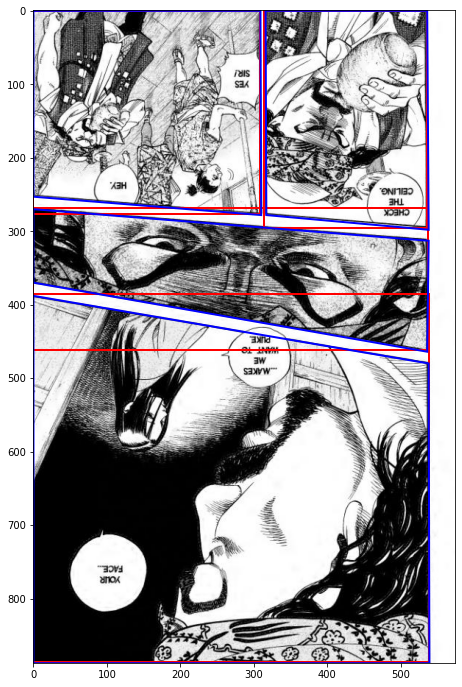

In [18]:

print(size)

fig, ax = plt.subplots(figsize=(12,12))
plt.imshow(img2)
for box in bounding_boxes_rec:
    xmin,xmax,ymin,ymax = box

    w = xmax - xmin
    h = ymax - ymin

    rect = patches.Rectangle((xmin, ymin), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    


for poly in bounding_boxes_poly:
       
    
    
    polygon_points = []
    for i in range(0, len(poly), 2):
        x = poly[i] 
        y = poly[i+1] 
        polygon_points.append((x, y))    
    

    polygon = patches.Polygon(polygon_points, closed=True, linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(polygon)


In [19]:

def create_rotated_xml(rotated_bndbox, rotated_polygon,new_size , original_tree, output_path):
    
    """Create a new XML file with rotated annotations."""
    output_dir = os.path.dirname(output_path)
    os.makedirs(output_dir, exist_ok=True)
    shutil.copyfile(original_tree, output_path)

    # Parse the copied XML file
    tree = ElementTree.parse(output_path)
    root = tree.getroot()
    
    
    file_name_here = root.find('filename')
    file_name_here.text = output_path.split('/')[-1]


    for size in root.findall('size'):
        img_width = size.find('width')
        img_width.text = str(new_size[0])
        
        
        img_height = size.find('height')
        img_height.text = str(new_size[1])
    
    
    # Update the bounding box
    count = 0
    
    for obj in root.findall("object"):
#         if count == len(rotated_bndbox) == len(rotated_polygon):
#             break
        bndbox_elem = obj.find("bndbox")
        
        if bndbox_elem is not None:
            bndbox_elem.find("xmin").text = str(rotated_bndbox[count][0])
            bndbox_elem.find("xmax").text = str(rotated_bndbox[count][1])
            bndbox_elem.find("ymin").text = str(rotated_bndbox[count][2])
            bndbox_elem.find("ymax").text = str(rotated_bndbox[count][3])

        # Update the polygon
        polygon_elem = obj.find("polygon")
#             if polygon_elem is not None:
#                 # Clear existing points
#                 for pt in polygon_elem.findall("pt"):
#                     polygon_elem.remove(pt)


        i = 1
        stt = 0
        while True:
            x_tag = f'x{i}'
            y_tag = f'y{i}'
            x = polygon_elem.find(x_tag)
            y = polygon_elem.find(y_tag)
            
            
            if x is None or y is None:
                break  # No more points

            try:
                # Convert the text to integer points
                x.text =  str(rotated_polygon[count][stt])
                y.text =  str(rotated_polygon[count][stt +1])
                stt +=2
                
            except Exception as e:
                print(f"Error parsing point {x_tag}, {y_tag} in {xml_path}: {e}")
            
            i += 1


#                 # Add new points
#                 for i in range(0, len(rotated_polygon), 2):
#                     pt_elem = ElementTree.SubElement(polygon_elem, "pt")
#                     x_elem = ElementTree.SubElement(pt_elem, "x")
#                     y_elem = ElementTree.SubElement(pt_elem, "y")
#                     x_elem.text = str(rotated_polygon[i])
#                     y_elem.text = str(rotated_polygon[i+1])
        count+=1
    tree.write(output_path)


In [20]:
create_rotated_xml(bounding_boxes_rec,bounding_boxes_poly, size,'./Panel-extraction-2/train/data_moi_18_9-100_jpg.rf.dc0e3bf5f93b23f90e6c1bf862dc3bab.xml','./Panel-extraction-2/aug/hehehehehehehehe.xml')

In [24]:
def get_augmentation(og_img_folder_path, aug_img_folder_path = None,get_num = 30):
    all_img,all_info,all_xml = load_images_and_masks(og_img_folder_path)
    random_numbers = random.sample(range(len(all_img) - 1), get_num)
    for idx in random_numbers:
        
#         if idx % 10 in [1,2]:
#         ###xoay 90
#             img_new,rotated_bndbox, rotated_polygon, new_size = xoay_90(all_img[idx],*all_info[idx])
#             create_rotated_xml(rotated_bndbox, rotated_polygon,new_size , all_xml[idx], f'Panel-extraction-2/aug{str(all_xml[idx])[24:-4]}_xoay_90.xml')
#             img_new_obj = Image.fromarray(img_new)
#             img_new_obj.save(f'Panel-extraction-2/aug{str(all_xml[idx])[24:-4]}_xoay_90.jpg')
        
        if idx % 10 in [1,3,4]:        
        #xoay 180
            img_new,rotated_bndbox, rotated_polygon, new_size = xoay_180(all_img[idx],*all_info[idx])
            create_rotated_xml(rotated_bndbox, rotated_polygon,new_size , all_xml[idx], f'Panel-extraction-2/aug{str(all_xml[idx])[24:-4]}_xoay_180.xml')
            img_new_obj = Image.fromarray(img_new)
            img_new_obj.save(f'Panel-extraction-2/aug{str(all_xml[idx])[24:-4]}_xoay_180.jpg')
        
        
#         if idx % 10 in [5,6]:
#         #xoay 270
#             img_new,rotated_bndbox, rotated_polygon, new_size = xoay_270(all_img[idx],*all_info[idx])
#             create_rotated_xml(rotated_bndbox, rotated_polygon,new_size , all_xml[idx], f'Panel-extraction-2/aug{str(all_xml[idx])[24:-4]}_xoay_270.xml')
#             img_new_obj = Image.fromarray(img_new)
#             img_new_obj.save(f'Panel-extraction-2/aug{str(all_xml[idx])[24:-4]}_xoay_270.jpg')
        
        
        if idx % 10 in [2,7,8]:
        # hor flip
            img_new,rotated_bndbox, rotated_polygon, new_size = horizontal_flip(all_img[idx],*all_info[idx])
            create_rotated_xml(rotated_bndbox, rotated_polygon,new_size , all_xml[idx], f'Panel-extraction-2/aug{str(all_xml[idx])[24:-4]}_hor_flip.xml')
            img_new_obj = Image.fromarray(img_new)
            img_new_obj.save(f'Panel-extraction-2/aug{str(all_xml[idx])[24:-4]}_hor_flip.jpg')
        
        
        if idx % 10 in [9,0,5,6]:
        #ver_flip
            img_new,rotated_bndbox, rotated_polygon, new_size = vertical_flip(all_img[idx],*all_info[idx])
            create_rotated_xml(rotated_bndbox, rotated_polygon,new_size , all_xml[idx], f'Panel-extraction-2/aug{str(all_xml[idx])[24:-4]}_ver_flip.xml')
            img_new_obj = Image.fromarray(img_new)
            img_new_obj.save(f'Panel-extraction-2/aug{str(all_xml[idx])[24:-4]}_ver_flip.jpg')

        
        
    
    

In [25]:
get_augmentation('./Panel-extraction-2/train',get_num = 230)  #chỉ cần nhập folder ảnh 
                                                #gốc là dùng đc,
                                                # nếu muốn chọn số ảnh đc augment thì 
                                                # nhập param 'get_num = 100 (hoặc số nào đó)'

In [23]:
src_folder = './Panel-extraction-2/train'
dest_folder = './Panel-extraction-2/augin'  # Adjust as needed for the new folder name

# Copy the folder
shutil.copytree(src_folder, dest_folder)

'./Panel-extraction-2/augin'

In [21]:
all_img,all_info,all_xml = load_images_and_masks('./Panel-extraction-2/augin')

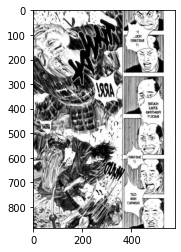

In [22]:
plt.imshow(all_img[0])

In [23]:
all_info[0]

([[366.0, 528.0, 1.0, 86.0],
  [366.0, 527.0, 102.0, 256.0],
  [366.0, 528.0, 272.0, 422.0],
  [369.0, 532.0, 439.0, 590.0],
  [368.0, 531.0, 603.0, 748.0],
  [367.0, 529.0, 765.0, 886.0],
  [0.0, 363.0, 1.0, 886.0]],
 [[530, 0, 368, 0, 368, 84, 530, 84],
  [529, 100, 367, 100, 367, 255, 529, 255],
  [530, 270, 367, 270, 367, 421, 530, 421],
  [533, 438, 370, 438, 370, 588, 533, 588],
  [532, 601, 369, 601, 369, 747, 532, 747],
  [531, 763, 369, 763, 369, 885, 531, 885],
  [364, 0, 1, 0, 1, 885, 364, 885]],
 (576, 885))

In [24]:
all_xml[0]

'./Panel-extraction-2/augin/data_moi_18_9-298_jpg.rf.b28b0c3f43352ac1954f750c25686b82_hor_flip.xml'

(576, 885)


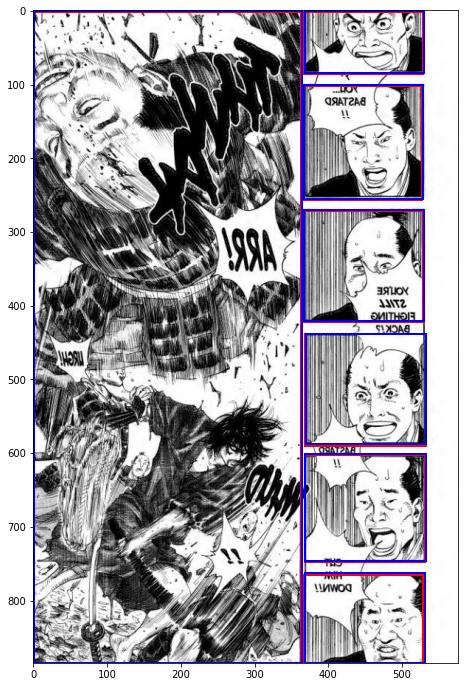

In [33]:

print(all_info[0][2])

fig, ax = plt.subplots(figsize=(12,12))
plt.imshow(all_img[0])
for box in all_info[0][0]:
    xmin,xmax,ymin,ymax = box

    w = xmax - xmin
    h = ymax - ymin

    rect = patches.Rectangle((xmin, ymin), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    


for poly in all_info[0][1]:
       
    
    
    polygon_points = []
    for i in range(0, len(poly), 2):
        x = poly[i] 
        y = poly[i+1] 
        polygon_points.append((x, y))    
    

    polygon = patches.Polygon(polygon_points, closed=True, linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(polygon)


In [47]:
lmao('./Panel-extraction-2/aug/hehehehehehehehe.xml')

([[0.0, 538.0, 386.0, 887.0],
  [0.0, 537.0, 269.0, 462.0],
  [314.0, 536.0, 0.0, 296.0],
  [0.0, 309.0, 0.0, 276.0]],
 [[538, 480, 539, 888, 0, 888, 0, 388],
  [536, 464, 0, 370, 0, 270, 538, 313],
  [538, 298, 317, 278, 316, 0, 536, 0],
  [310, 278, 0, 253, 0, 0, 309, 0]],
 (575, 888))

In [2]:
!nvidia-smi

Tue Nov 12 22:26:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060        Off | 00000000:02:00.0 Off |                  N/A |
| 55%   75C    P2             156W / 170W |  10556MiB / 12288MiB |    100%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--